# The birthday problem

How many people do you need to get in the same room before it becomes more likely than not that two people in the room share a birthday? (Not the same year, just the same month/day).

The answer is pretty counterintuitive so my friend Shawn and I put this quick Monte Carlo together to solve the problem. Basically, it takes far fewer people in a room to find a matching birthday than you would imagine: with **only 23** people in a room you are more likely than not to find that two people have the same birthday.

生日悖論是指，一個房間要多少人，兩個人的生日相同的機率會大於50%? 答案是23人。這意味著在一個標準小學班級（30人）中，存在兩人生日相同的可能性更高。超過 60 這種機率會大於 99%。大多數人會認為，23人中有2人生日相同的機率應該遠遠小於50%。

### How is this possible?
When there are 23 people in the room you actually can make **253** comparisons.

當房間裡有 N 個人時，您實際上可以進行 N*(N-1) 除 2 次的次方比較 (253)

$$ comparisons = \dfrac{23*22}{2}$$ 

So the probability that with 23 people in the room you'll have a match is

所以機率上就是 364/365 的 253次方

$$ probability = \Bigg(\dfrac{364}{365}\Bigg)^{253}$$ 


In [36]:
import math   # 导入 math 模块

a = int(input("How many:"))

pw = int(a*(a-1)/2)
print("comparison:",pw)

print("Diff prob=",math.pow(364/365, pw))
print("Same prob=", 1 - math.pow(364/365, pw))


How many:50
comparison: 1225
Diff prob= 0.03470851324855738
Same prob= 0.9652914867514426


which is about 50%. With 23 people in the room you'll have a match 53% of the time. Go figure. The best way to think of this intuitively is that when you walk in a room you might compare your birthday to the other 23 people; you need to also consider the comparisons that every other person will make against the rest of the room. That's a lot of comparisons. 

您可能會將您的生日與其他 23 個人進行比較； 您還需要考慮其他人與房間其他人進行的比較。 這是很多比較。

### What's a Monte Carlo simulation?

let's Monte Carlo. we will create a "room" full of `n` people and see whether that room has a matching birthday. In this case, we can build that same room 10,000 times (really we just need some arbitrarily large number). As we'll see, if we create a room with 23 people having random birthdays 10,000 times, in about 5,000 of those rooms do we find a match.

Monte Carlo 蒙地卡羅模擬法 : 是指使用亂數來解決計算問題的方法。我們創建一個充滿 n 人的房間，如果我們創建一個房間，其中 23 個人的生日是隨機的 10,000 次，那麼我們會在其中大約 5,000 個房間中找到匹配項 (50%)。

In [22]:
from datetime import datetime
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

Generate a birthday (an integer between 1 and 365)

In [24]:
def gen_bday():
    bday = random.randint(1,365)
    return bday

For each room size from 2 person to 50 people (call this `n`), try "building" the room with that number of people 10,000 times. For each of the 10,000 rooms built for a given `n` how many of those rooms have at least 2 people with the same birthday?

In [26]:
prob_dict = {}

# For each room size from 2 person to 50 people
for n in range(2, 50): 
    num_pers = n
    success_count = 0
    
    # run this 10000 per number of people in the room
    for e in range(0,10000):
        people = []
        for e in range(num_pers):
            people.append(gen_bday())
        
        # there was a match then the set should be smaller than this `people` list
        if len(people) > len(set(people)):
            success_count += 1
    prob_dict[n] = success_count/float(10000)

In [27]:
prob_dict

{2: 0.0033,
 3: 0.0073,
 4: 0.0166,
 5: 0.0279,
 6: 0.0397,
 7: 0.0581,
 8: 0.072,
 9: 0.0894,
 10: 0.1119,
 11: 0.1403,
 12: 0.165,
 13: 0.1893,
 14: 0.23,
 15: 0.2465,
 16: 0.2845,
 17: 0.319,
 18: 0.344,
 19: 0.3734,
 20: 0.4124,
 21: 0.4486,
 22: 0.4738,
 23: 0.5094,
 24: 0.5332,
 25: 0.5692,
 26: 0.6035,
 27: 0.6253,
 28: 0.6514,
 29: 0.6894,
 30: 0.7116,
 31: 0.7353,
 32: 0.7537,
 33: 0.7644,
 34: 0.7976,
 35: 0.8141,
 36: 0.8371,
 37: 0.8576,
 38: 0.8649,
 39: 0.8738,
 40: 0.8888,
 41: 0.9045,
 42: 0.9137,
 43: 0.9206,
 44: 0.9355,
 45: 0.9439,
 46: 0.951,
 47: 0.9568,
 48: 0.9646,
 49: 0.9658}

Let's plot the results and see how this actually looks

In [28]:
df = pd.Series(prob_dict)

In [31]:
#%pylab inline

Text(0, 0.5, 'Probability of match')

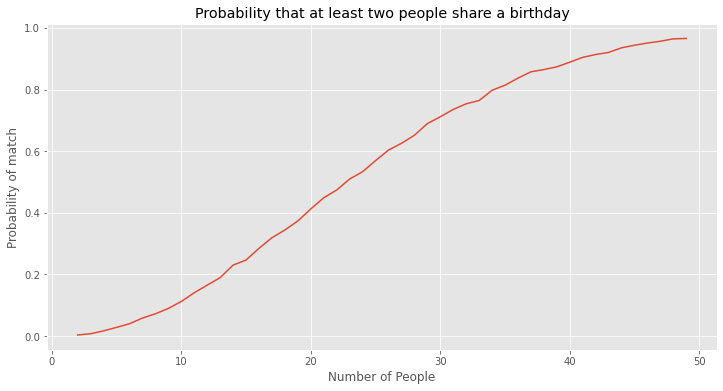

In [30]:
ax = df.plot(title='Probability that at least two people share a birthday', figsize=(12,6))
ax.set_xlabel("Number of People")
ax.set_ylabel("Probability of match")